# TIME GAN 

## Idea & Challenge & Explanation
- A generative model for time-series data should also learn the temporal dynamics that shapes how one sequence of observations follows another 
- The model learns a time-series embedding space while optimizing both supervised and adversarial objectives that encourage it to adhere to the dynamics observed while sampling from historical data during training.
- A successful generative model for time-series data needs to capture both the cross-sectional distribution of features at each point in time and the longitudinal relationships among these features over time. Expressed in the image context we just discussed, the model needs to learn not only what a realistic image looks like, but also how one image evolves from the next as in a video.

#### ! What differentiate it from "RNN" Gan 
TimeGAN explicitly incorporates the autoregressive nature of time series by combining the unsupervised adversarial loss on both real and synthetic sequences familiar from the DCGAN example with a stepwise supervised loss with respect to the original data. The goal is to reward the model for learning the distribution over transitions from one point in time to the next present in the historical data

## Ressources
- [Kaggle Notebook](https://www.kaggle.com/code/faaizhashmi/generating-synthetic-data-apple-stock-using-gan) 
- [Medium article ](https://towardsdatascience.com/synthetic-time-series-data-a-gan-approach-869a984f2239)
- [Paper](https://papers.nips.cc/paper/2019/file/c9efe5f26cd17ba6216bbe2a7d26d490-Paper.pdf)
- [Generative Adversarial Nets for Synthetic Time Series Data](https://github.com/stefan-jansen/machine-learning-for-trading/blob/main/21_gans_for_synthetic_time_series/README.md)

## Architecture 
- TimeGAN architecture introduces the concept of supervised loss —the model is encouraged to capture time conditional distribution within the data by using the original data as a supervision. Also, we can observe the introduction of an embedding network that is responsible to reduce the adversarial learning space dimensionality.

- As mentioned above, TimeGAN is a framework to synthesize sequential data compose by 4 networks, that play distinct roles in the process of modelling the data: the expected generator and discriminator, but also, by a recovery and embedder models.

### Components (Class) you need to define 

[See this ](https://github.com/stefan-jansen/machine-learning-for-trading/blob/main/21_gans_for_synthetic_time_series/README.md#the-four-components-of-the-timegan-architecture)
1. Supervisor : Take care of the latent space
2. Generator (Adversarial Network): 
3. Discriminator (Adversarial Network): 
4. Recovery (AE): 
5. Embedder (AE): 

The key insight is that the autoencoding components are trained jointly with the adversarial components, such that TimeGAN simultaneously learns to encode features, generate representations, and iterate across time. The embedding network provides the latent space, the adversarial network operates within this space, and the latent dynamics of both real and synthetic data are synchronized through a supervised loss.


### Loss function
1. The reconstruction loss, which refers to the auto-encoder (embedder & recovery), that in a nutshell compares how well was the reconstruction of the encoded data when compared to the original one.
2. The supervised loss that, in a nutshell, is responsible to capture how well the generator approximates the next time step in the latent space.
3. The unsupervised loss, this one it’s already familiar to us, a it reflects the relation between the generator and discriminator networks (min-max game). 

### Training phases
1. Training the autoencoder on the provided sequential data for optimal reconstruction
2. Training the supervisor using the real sequence data to capture the temporal behavior of the historical information, and finally,
3. The combined training of four components while minimizing all the three loss functions mentioned previously.

### Concept 
- Embedding network 
- Time conditional distribution 
- adversarial learning space
- [Stepwise dependency (and stepwise supervised loss)](https://arxiv.org/abs/2303.15438)
- Learn joint distribution : It is expensive to create GANs with different combinations of facial characters P(blond, female, smiling, with glasses), P(brown, male, smiling, no glasses) etc…The curse of dimensionality makes the number of GANs to grow exponentially. Instead, we can learn individual data distribution and combine them to form different distributions. i.e. different attribute combinations.

#### Optimization 
- Professor Forcing involved training an auxiliary discriminator to distinguish between free-running and teacher-forced hidden states, thus encouraging the network’s training and sampling dynamics to converge [2].
-  Actor-critic methods [13] have also been proposed, introducing a critic conditioned on target outputs, trained to estimate next-token value functions that guide the actor’s free-running predictions [3]. However, while the motivation for these methods is similar to ours in accounting for stepwise transition dynamics, they are inherently deterministic, and do not accommodate explicitly sampling from a learned distribution—central to our goal of synthetic data generation.

### Question 
- What are the supervised and unsupervised loss?   
    - Combinaison de la perte adversaire non supervisée et de la perte supervisée : TimeGAN utilise deux types de pertes lors de l'entraînement. La première est la perte adversaire non supervisée, qui est similaire à celle utilisée dans DCGAN et d'autres GANs. Cette perte encourage le générateur à produire des données qui sont indiscernables de la série temporelle réelle pour le discriminateur. La seconde est une perte supervisée qui compare les séquences générées à la série temporelle réelle. Cette perte encourage le générateur à reproduire les transitions spécifiques d'un point à l'autre dans la série temporelle réelle.
- The AR aspect: 
    - Incorporation de la nature autorégressive des séries temporelles : Les séries temporelles sont souvent autorégressives, ce qui signifie que chaque point de données dépend des points de données précédents. TimeGAN tient compte de cette caractéristique en formant le générateur pour produire non seulement des points de données individuels qui ressemblent à ceux de la série temporelle réelle, mais aussi des séquences de points de données qui maintiennent les mêmes dépendances temporelles.
- What part of the architecture is actually learning the temporal dynamics of the data? 
    - TimeGAN explicitly incorporates the autoregressive nature of time series by combining the unsupervised adversarial loss on both real and synthetic sequences familiar from the DCGAN example with a stepwise supervised loss with respect to the original data. The goal is to reward the model for learning the distribution over transitions from one point in time to the next present in the historical data.
    - Answer: 4.1 Embedding and Recovery Functions | The embedding and recovery functions provide mappings between feature and latent space, allowing the adversarial network to learn the underlying temporal dynamics of the data via lower-dimensional representations. 
- Why does the Generator output in the latent space? 


# [Paper](https://papers.nips.cc/paper/2019/file/c9efe5f26cd17ba6216bbe2a7d26d490-Paper.pdf)

#### [Theory](https://papers.nips.cc/paper/2019/file/c9efe5f26cd17ba6216bbe2a7d26d490-Paper.pdf) 
-  A model is not only tasked with capturing the distributions of features within each time point, it should also capture the potentially complex dynamics of those variables across time
- conditional distribution p(xt|x1:t−1) of temporal transitions as well
- Autoregressive models explicitly factor the distribution of sequences into a product of conditionals Qt p(xt|x1:t−1). However, while useful in the context of forecasting, this approach is fundamentally deterministic, and is not truly generative in the sense that new sequences can be randomly sampled from them without external conditioning.
- Normal GAN on sequential data
    - On the other hand, a separate line of work has focused on directly applying the generative adversarial network (GAN) framework to sequential data, primarily by instantiating recurrent networks for the roles of generator and discriminator [4, 5, 6]. While straightforward, the adversarial objective seeks to model p(x1:T ) directly, without leveraging the autoregressive prior. Importantly, simply summing
    the standard GAN loss over sequences of vectors may not be sufficient to ensure that the dynamics of the network efficiently captures stepwise dependencies present in the training data

- Contribution (new feature): First, in addition to the unsupervised adversarial loss on both real and synthetic sequences, we introduce a stepwise supervised loss using the original data as supervision, thereby explicitly encouraging the model to capture the stepwise conditional distributions in the data.

- Second, we introduce an embedding network to provide a reversible mapping between features and latent representations, thereby reducing the high-dimensionality of the adversarial learning space

- Supervised loss: Importantly, the supervised loss is minimized by jointly training both the embedding and generator networks, such that the latent space not only serves to promote parameter efficiency—it is specifically conditioned to facilitate the generator in learning temporal relationships.

- Our approach is the first to combine the flexibility of the unsupervised GAN framework with the control afforded by supervised training in autoregressive models.

- 

#### Litterature review 
1. Recurrent Conditional GAN (RCGAN) [5] took a similar approach, introducing minor architectural differences such as dropping the dependence on the previous output while conditioning on additional input [14]. A multitude of applied studies have since utilized these frameworks to generate synthetic sequences in such diverse domains as text [15], finance [16], biosignals [17], sensor [18] and smart grid data [19], as well as renewable scenarios [20]. Recent work [6] has proposed conditioning on time stamp information to 2 handle irregularly sampling. However, unlike our proposed technique, these approaches rely only on the binary adversarial feedback for learning, which by itself may not be sufficient to guarantee specifically that the network efficiently captures the temporal dynamics in the training data.
2. However, unlike our proposed technique, these approaches rely only on the binary adversarial feedback for learning, which by itself may not be sufficient to guarantee specifically that the network efficiently captures the temporal dynamics in the training data.
3.  By contrast, our proposed method generalizes to arbitrary time-series data, incorporates stochasticity at each time step, as well as employing an embedding network to identify a lower-dimensional space for the generative model to learn the stepwise distributions and latent dynamics of the data.


### Problem formulation
Consider the general data setting where each instance consists of two elements: static features (that do not change over time, e.g. gender), and temporal features (that occur over time, e.g. vital signs). Let S be a vector space of static features, X of temporal features, and let S ∈ S, X ∈ X be random vectors that can be instantiated with specific values denoted s and x. We consider tuples of the form (S, X1:T ) with some joint distribution p. 

Our goal is to use training data D to learn a density pˆ(S, X1:T ) that best approximates p(S, X1:T ). This is a high-level objective, and—depending on the lengths, dimensionality, and distribution of the data—may be difficult to optimize in the standard GAN framework. Therefore we additionally make use of the autoregressive decomposition of the joint p(S, X1:T ) = p(S) Qt p(Xt|S, X1:t−1) to focus specifically on the conditionals, yielding the complementary—and simpler—objective of learning a density p(Xt|S, X1:t−1) that best approximates p(Xt|S, X1:t−1) at any time t.

#### Two objectives
Importantly, this breaks down the sequence-level objective (matching the joint
distribution) into a series of stepwise objectives (matching the conditionals). 

The first is global, min pˆD p(S, X1:T )||pˆ(S, X1:T )) (1) 

where D is some appropriate measure of distance between distributions. 

The second is local, min pˆD p(Xt|S, X1:t−1)||pˆ(Xt|S, X1:t−1)  (2) 

for any t. Under an ideal discriminator in the GAN framework, the former takes the form of the Jensen-Shannon divergence. Using the original data for supervision via   maximum-likelihood (ML) training, the latter takes the form of the Kullback-Leibler divergence. Note that minimizing the former relies on the presence of a perfect adversary (which we may not have access to), while minimizing the latter only depends on the presence of ground-truth sequences (which we do have access to). Our target, then, will be a combination of the GAN objective (proportional to Expression 1) and the ML objective (proportional to Expression 2). As we shall see, this naturally yields a training procedure
that involves the simple addition of a supervised loss to guide adversarial learning.

### Components 

#### 1. Embedding & Recovery functions
- The embedding and recovery functions provide mappings between feature and latent space, allowing the adversarial network to learn the underlying temporal dynamics of the data via lower-dimensional representations. 
- Note that the embedding and recovery functions can be parameterized by any architecture of choice, with the only stipulation being that they be autoregressive and obey causal ordering (i.e. output(s) at each step can only depend on preceding information). For example, it is just as possible to implement the former with temporal convolutions [31], or the latter via an attention-based decoder [32].

#### 2. Sequence Generator and Discriminator
- Instead of producing synthetic output directly in feature space, the generator first outputs into the embedding space.
- Random vector zS can be sampled from a distribution of choice, and zt follows a stochastic process; here we use the Gaussian distribution and Wiener process
- Finally, the discriminator also operates from the embedding space.
- Discriminator Architecture: Similarly, there are no restrictions on architecture beyond the generator being autoregressive; here we use a standard recurrent formulation for ease of exposition.

#### 3. Jointly Learning to Encode, Generate, and Iterate
- First, purely as a reversible mapping between feature and latent spaces, the embedding and recovery functions should enable accurate reconstructions ˜s, x˜1:T of the original data s, x1:T from their latent representations hS , h1:T . Therefore our first objective function is the reconstruction loss 
- In TimeGAN, the generator is exposed to two types of inputs during training. First, in pure openloop mode, the generator—which is autoregressive—receives synthetic embeddings hˆS , hˆ1:t−1 (i.e. its own previous outputs) in order to generate the next synthetic vector hˆt. Gradients are then computed on the unsupervised loss. This is as one would  xpect—that is, to allow maximizing (for the discriminator) or minimizing (for the generator) the likelihood of providing correct classifications yˆS , yˆ1:T for both the training data hS , h1:T as well as for synthetic output hˆS , hˆ1:T from the generator,
- Relying solely on the discriminator’s binary adversarial feedback may not be sufficient incentive for the generator to capture the stepwise conditional distributions in the data. To achieve this more efficiently, we introduce an additional loss to further discipline learning. In an alternating fashion, we also train in closed-loop mode, where the generator receives sequences of embeddings of actual data h1:t−1 (i.e. computed by the embedding network) to generate the next latent vector. Gradients can now be computed on a loss that captures the discrepancy between distributions p(Ht|HS , H1:t−1) and pˆ(Ht|HS , H1:t−1). 
- Important: While LU pushes the generator to create realistic sequences (evaluated by an imperfect adversary), LS further ensures that it produces similar stepwise transitions (evaluated by ground-truth targets).

### Optimization
- θe, θr, θg, θd respectively denote the parameters of the embedding, recovery, generator, and discriminator networks
- Importantly, LS is included such that the embedding process not only serves to reduce the dimensions of the adversarial learning space—it is actively conditioned to facilitate the generator in learning temporal relationships from the data.
- generator and discriminator networks are trained adversarially as follows min θg (ηLS + maxθd LU)
- The embedding task serves to regularize adversarial learning—which now occurs in a lower-dimensional latent space.

#### Key point 
1. Therefore we additionally make use of the autoregressive decomposition of the joint p(S, X1:T ) = p(S)Qt p(Xt|S, X1:t−1) to focus specifically on the conditionals, yielding the complementary—and simpler—objective of learning a density pˆ(Xt|S, X1:t−1) that best approximates p(Xt|S, X1:t−1) at any time t

2. Look at expression (1) & (2) of two objectives: As we shall see, this naturally yields a training procedure that involves the simple addition of a supervised loss to guide adversarial learning.

3. (Doesn't only receives point at one time point) | In TimeGAN, the generator is exposed to two types of inputs during training. First, in pure openloop mode, the generator—which is autoregressive—receives synthetic embeddings hˆS , hˆ1:t−1 (i.e. its own previous outputs) in order to generate the next synthetic vector hˆt.

4. Relying solely on the discriminator’s binary adversarial feedback may not be sufficient incentive for the generator to capture the stepwise conditional distributions in the data. To achieve this more efficiently, we introduce an additional loss to further discipline learning. In an alternating fashion, we also train in closed-loop mode, where the generator receives sequences of embeddings of actual data h1:t−1 (i.e. computed by the embedding network) to generate the next latent vector. Gradients can now be computed on a loss that captures the discrepancy between distributions p(Ht|HS , H1:t−1) and pˆ(Ht|HS , H1:t−1). 

5. Putting it together: Applying maximum likelihood yields the familiar supervised loss,where gX (hS , ht−1, zt) approximates Ezt∼N [ˆp(Ht|HS , H1:t−1, zt)] with one sample zt—as is standard in stochastic gradient descent. In sum, at any step in a training sequence, we assess the difference between the actual next-step latent vector (from the embedding function) and synthetic next-step latent vector (from the generator—conditioned on the actual historical sequence of latents). While LU pushes the generator to create realistic sequences (evaluated by an imperfect adversary), LS further ensures that it produces similar stepwise transitions (evaluated by ground-truth targets).


#### Questions
1. Understanding the two objectives 
2. Why does the discriminator work in the embedding space?
    - Réduction de la dimensionnalité : Les espaces d'incorporation ont généralement une dimensionnalité beaucoup plus faible que les données d'entrée d'origine. Cela peut rendre le travail du discriminateur plus facile, car il a moins de dimensions à considérer.
    - Extraction de caractéristiques : Les espaces d'incorporation sont généralement conçus pour capturer les caractéristiques importantes des données. Par conséquent, en travaillant dans l'espace d'incorporation, le discriminateur peut se concentrer sur ces caractéristiques importantes et ignorer le bruit et les détails inutiles
    - Compatibilité avec le générateur : Si le générateur produit des données dans l'espace d'incorporation (comme c'est souvent le cas dans les GANs), alors il est logique de faire fonctionner le discriminateur dans le même espace.
    - Amélioration de la performance : Dans de nombreux cas, faire fonctionner le discriminateur dans l'espace d'incorporation peut améliorer la performance du GAN. Par exemple, cela peut aider à stabiliser l'entraînement et à produire des échantillons générés de meilleure qualité.

# Implementation

## Steps 
1. Selecting and preparing real and random time series inputs
2. Creating the key TimeGAN model components
3. Defining the various loss functions and train steps used during the three training phases
4. Running the training loops and logging the results
5. Generating synthetic time series and evaluating the results

[See notebook](https://github.com/stefan-jansen/machine-learning-for-trading/blob/main/21_gans_for_synthetic_time_series/02_TimeGAN_TF2.ipynb)

In [16]:
# Import this apple stock price dataset and filter from 2015 to 2021
# use this path: /Users/philippebeliveau/Desktop/Notebook_Jupyter_R/Synthetic_Data/Dataset/AAPL.csv
import pandas as pd
pd.set_option('display.max_columns', None)  
df = pd.read_csv('/Users/philippebeliveau/Desktop/Notebook/GAN/Dataset/AAPL.csv')
df['Date'] = pd.to_datetime(df['Date'])
df = df[(df['Date'] >= '2015-01-01') & (df['Date'] <= '2021-01-01')]
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
8589,2015-01-02,27.847500,27.860001,26.837500,27.332500,24.678247,212818400
8590,2015-01-05,27.072500,27.162500,26.352501,26.562500,23.983023,257142000
8591,2015-01-06,26.635000,26.857500,26.157499,26.565001,23.985283,263188400
8592,2015-01-07,26.799999,27.049999,26.674999,26.937500,24.321609,160423600
8593,2015-01-08,27.307501,28.037500,27.174999,27.972500,25.256100,237458000


In [17]:
seq_len = 24
n_seq = 1
batch_size = 10

Text(0.5, 1.0, 'Apple Stock Price')

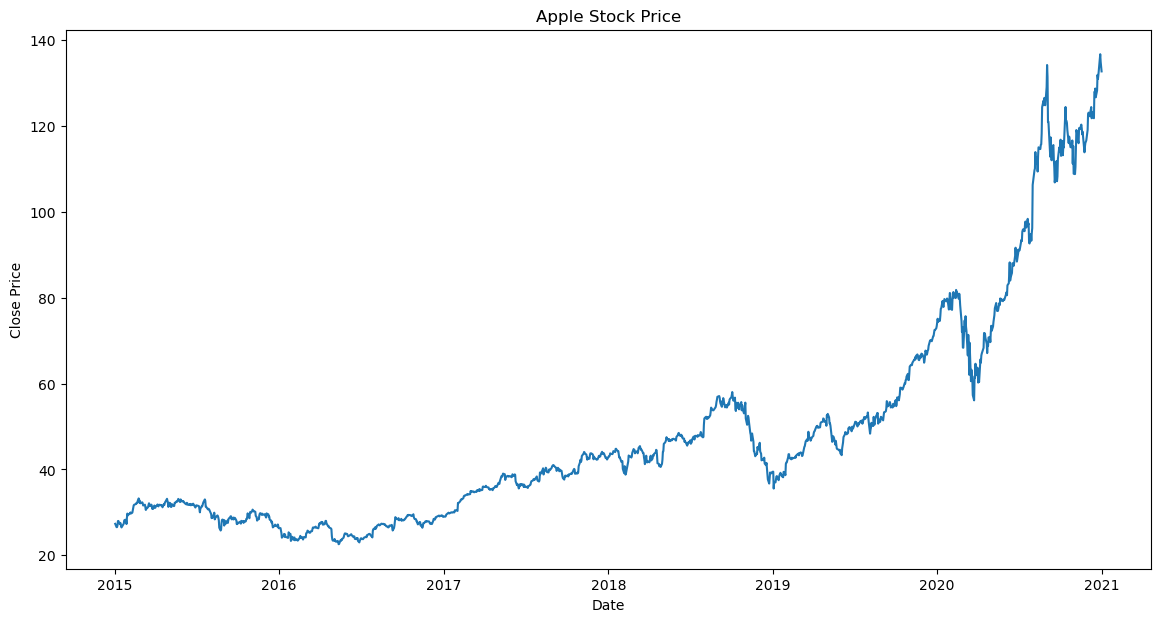

In [18]:
# Plot my series to see the trend and put some legend and axis
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Close'])
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Apple Stock Price')

In [19]:
# Normalize the data using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
df['Scale_Close'] = scaler.fit_transform(df['Close'].values.reshape(-1,1))

# Create windowed dataset of only the close price
data = []
for i in range(len(df) - seq_len):
    data.append(df['Scale_Close'].values[i:i+seq_len])

n_windows = len(data)

In [53]:
# Load the real data into a PyTorch DataLoader 

import torch
from torch.utils.data import DataLoader, TensorDataset, RandomSampler

# Convert data to PyTorch tensors
data_tensor = torch.tensor(data)

# Create a TensorDataset from data
dataset = TensorDataset(data_tensor)

# Create a RandomSampler to shuffle the data
sampler = RandomSampler(dataset)

# Create a DataLoader to batch the data and enable iteration
real_series = DataLoader(dataset, batch_size=batch_size, sampler=sampler)

# Create an iterator from the DataLoader
real_series_iter = iter(real_series)

# Show the first batch of real data
real_batch = next(real_series_iter)

# show me the dimension of the real batch
real_batch[0].shape

torch.Size([10, 24])

In [78]:
# Make sure my real_series_iter is a tensor with dtype
# Check if seq is a tensor
is_tensor = isinstance(real_batch[0], torch.Tensor)

print(is_tensor)

True


In [87]:
real_batch = next(real_series_iter)
real_batch[0]

tensor([[0.2864, 0.2981, 0.2925, 0.2794, 0.2802, 0.2805, 0.2841, 0.2790, 0.2858,
         0.2889, 0.2850, 0.2949, 0.2967, 0.3000, 0.3044, 0.3105, 0.3016, 0.2935,
         0.2923, 0.2991, 0.2761, 0.2719, 0.2887, 0.2783],
        [0.0662, 0.0579, 0.0565, 0.0556, 0.0482, 0.0522, 0.0512, 0.0590, 0.0623,
         0.0635, 0.0601, 0.0625, 0.0607, 0.0602, 0.0613, 0.0592, 0.0568, 0.0545,
         0.0629, 0.0612, 0.0611, 0.0554, 0.0566, 0.0500],
        [0.2587, 0.2491, 0.2257, 0.2337, 0.2382, 0.2478, 0.2424, 0.2413, 0.2599,
         0.2463, 0.2441, 0.2545, 0.2629, 0.2630, 0.2680, 0.2676, 0.2460, 0.2545,
         0.2494, 0.2524, 0.2600, 0.2594, 0.2527, 0.2604],
        [0.1174, 0.1168, 0.1169, 0.1193, 0.1176, 0.1168, 0.1161, 0.1157, 0.1124,
         0.1127, 0.1111, 0.1128, 0.1114, 0.1103, 0.1141, 0.1138, 0.1168, 0.1187,
         0.1169, 0.1171, 0.1168, 0.1232, 0.1253, 0.1243],
        [0.8920, 0.9051, 0.8960, 0.9109, 0.8976, 0.8959, 0.9330, 0.9780, 0.9536,
         0.8614, 0.8621, 0.7908, 0.8302

In [56]:
# Create synthetic data
from torch.utils.data import DataLoader, IterableDataset

class RandomDataset(IterableDataset):
    def __init__(self, seq_len, n_seq):
        self.seq_len = seq_len
        self.n_seq = n_seq

    def __iter__(self):
        while True:
            yield torch.from_numpy(np.random.uniform(low=0, high=1, size=(self.seq_len, self.n_seq))).float()

# Create an instance of the dataset
dataset = RandomDataset(seq_len, n_seq)

# Create a DataLoader to batch the data and enable iteration
random_series = DataLoader(dataset, batch_size=batch_size)

# Create an iterator from the DataLoader
random_series_iter = iter(random_series)


## Network definition

In [129]:
# Network parameters

hidden_dim = 24
num_layers = 3

# Set up tensorboard X
from torch.utils.tensorboard import SummaryWriter
# Set up a log directory
# log_dir = 'logs'

writer = SummaryWriter()

### Embedder and recovery network 

In [130]:
class Embedder(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super(Embedder, self).__init__()
        self.lstm1 = nn.LSTM(input_dim, int(hidden_dim*3))
        self.lstm2 = nn.LSTM(int(hidden_dim*3), int(hidden_dim*2))
        self.lstm3 = nn.LSTM(int(hidden_dim*2), hidden_dim)

    def forward(self, x): # X is the real input sequence
        x, _ = self.lstm1(x)
        x, _ = self.lstm2(x)
        x, _ = self.lstm3(x)
        return x

In [131]:
# Recovery network
class Recovery(torch.nn.Module):
    def __init__(self, hidden_dim, seq_len):
        super(Recovery, self).__init__()
        self.lstm1 = nn.LSTM(hidden_dim, int(hidden_dim*3))
        self.lstm2 = nn.LSTM(int(hidden_dim*3), int(hidden_dim*2))
        self.lstm3 = nn.LSTM(int(hidden_dim*2), seq_len)

    def forward(self, x): # X is the real input sequence
        x, _ = self.lstm1(x)
        x, _ = self.lstm2(x)
        x, _ = self.lstm3(x)
        return x

### Generator & discriminator

In [132]:
# Generator network
class Generator(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super(Generator, self).__init__()
        self.lstm1 = nn.LSTM(input_dim, int(hidden_dim*3))
        self.lstm2 = nn.LSTM(int(hidden_dim*3), int(hidden_dim*2))
        self.lstm3 = nn.LSTM(int(hidden_dim*2), hidden_dim)

    def forward(self, x): # X is the real input sequence
        x, _ = self.lstm1(x)
        x, _ = self.lstm2(x)
        x, _ = self.lstm3(x)
        return x

In [133]:
# Discriminator network
class Discriminator(torch.nn.Module):
    def __init__(self, hidden_dim):
        super(Discriminator, self).__init__()
        self.lstm1 = nn.LSTM(hidden_dim, int(hidden_dim*3))
        self.lstm2 = nn.LSTM(int(hidden_dim*3), int(hidden_dim*2))
        self.linear = nn.Linear(int(hidden_dim*2), 1)

    def forward(self, x): # X is the real input sequence
        x, _ = self.lstm1(x)
        x, _ = self.lstm2(x)
        x = self.linear(x)
        return x

### Supervisor loss

In [134]:
class Supervisor(torch.nn.Module):
    def __init__(self, hidden_dim):
        super(Supervisor, self).__init__()
        self.lstm1 = nn.LSTM(hidden_dim, int(hidden_dim*3))
        self.lstm2 = nn.LSTM(int(hidden_dim*3), int(hidden_dim*2))
        self.lstm3 = nn.LSTM(int(hidden_dim*2), hidden_dim)

    def forward(self, x): # X is the real input sequence
        x, _ = self.lstm1(x)
        x, _ = self.lstm2(x)
        x, _ = self.lstm3(x)
        return x

## Phase 1: Autoencoder training

In [135]:
import torch.nn as nn
train_steps = 10000
gamma = 1
mse = nn.MSELoss()
bce = nn.BCELoss()

In [136]:
# The embedder receives the real sequence 
H = Embedder(seq_len, hidden_dim)

# # Check the data type of your input and model weights
# print(real_batch[0].dtype)
# print(H.lstm1.weight_ih_l0.dtype)

# # If they are not the same, you can convert your input data to the same data type as your model weights
# real_batch[0] = real_batch[0].to(H.lstm1.weight_ih_l0.dtype)

# # Get a batch of data
# real_batch = next(real_series_iter)

# # Convert the batch to a tensor
# real_batch_tensor = torch.stack(real_batch).float()

# Then you can pass your input data to your model
#embedder_representation = H(real_batch[0])

# Now pass the representation to the recovery network
R = Recovery(hidden_dim, seq_len)
# recovered_sequence = R(embedder_representation)


In [137]:
autoencoder = nn.Sequential(H, R)
autoencoder_optimizer = torch.optim.Adam(list(H.parameters()) + list(R.parameters()), lr=0.001)

# Autoencoder training loop
for epoch in range(100):
    while True:
        try:
            autoencoder.train()
            real_batch = next(real_series_iter)
            real_batch = real_batch[0]
            real_batch = real_batch.to(H.lstm1.weight_ih_l0.dtype)
            embedder_representation = H(real_batch)
            recovered_sequence = R(embedder_representation)
            loss = mse(recovered_sequence, real_batch)
            autoencoder_optimizer.zero_grad()
            loss.backward()
            autoencoder_optimizer.step()
        except StopIteration:
            # Restart if the data is exhausted
            real_series_iter = iter(real_series)
            break

    if epoch % 10 == 0:
        print(f'Epoch {epoch}, Loss {loss.item()}')
    # Return the loss to tensorboard
    writer.add_scalar('Autoencoder Loss', loss.item(), epoch)
    # Return the model
    writer.add_graph(autoencoder, real_batch)

Epoch 0, Loss 0.010589788667857647
Epoch 10, Loss 0.0005111127975396812
Epoch 20, Loss 0.001956796972081065
Epoch 30, Loss 0.0003545619547367096
Epoch 40, Loss 0.0002546900068409741
Epoch 50, Loss 0.00014872796600684524
Epoch 60, Loss 0.0007209382019937038
Epoch 70, Loss 0.0006000930443406105
Epoch 80, Loss 0.00018376966181676835
Epoch 90, Loss 0.0004856182786170393


In [138]:
# Now I need to train an autoencoder to make sure that the embedder and recovery network are working
R = Recovery(hidden_dim, seq_len)
H = Embedder(seq_len, hidden_dim)

autoencoder = nn.Sequential(H, R)
autoencoder_optimizer = torch.optim.Adam(list(H.parameters()) + list(R.parameters()), lr=0.001)

# Autoencoder training loop
for epoch in range(100):
    for real_batch in real_series_iter:
        autoencoder.train()
        #real_batch = next(real_series_iter)
        real_batch = real_batch[0]
        real_batch = real_batch.to(H.lstm1.weight_ih_l0.dtype)
        embedder_representation = H(real_batch)
        recovered_sequence = R(embedder_representation)
        loss = mse(recovered_sequence, real_batch)
        autoencoder_optimizer.zero_grad()
        loss.backward()
        autoencoder_optimizer.step()
        
    if epoch % 10 == 0:
        print(f'Epoch {epoch}, Loss {loss.item()}')
    # Return the loss to tensorboard
    writer.add_scalar('Autoencoder Loss', loss.item(), epoch)
    # Return the model
    # writer.add_graph(autoencoder, real_batch)
    

Epoch 0, Loss 0.073863185942173
Epoch 10, Loss 0.073863185942173
Epoch 20, Loss 0.073863185942173
Epoch 30, Loss 0.073863185942173
Epoch 40, Loss 0.073863185942173
Epoch 50, Loss 0.073863185942173
Epoch 60, Loss 0.073863185942173
Epoch 70, Loss 0.073863185942173
Epoch 80, Loss 0.073863185942173
Epoch 90, Loss 0.073863185942173


## Phase 2: Supervisor training

    def train_supervisor(x):
        with tf.GradientTape() as tape:
            h = embedder(x)
            h_hat_supervised = supervisor(h)
            g_loss_s = mse(h[:, 1:, :], h_hat_supervised[:, :-1, :])

        var_list = supervisor.trainable_variables
        gradients = tape.gradient(g_loss_s, var_list)
        supervisor_optimizer.apply_gradients(zip(gradients, var_list))
        return g_loss_s

*What is the supervisor training doing? 

What is the flow?
- We know that the embedder must receive real sequence 
- The recovery then receives the output of the embedder and do his reconstruction 
We then first need to train an autoencoder

In [139]:
# Supervisor 
S = Supervisor(hidden_dim)
# h_hat_supervisor = S(embedder_representation)

# Define the optimizer for the Supervisor
supervisor_optimizer = torch.optim.Adam(list(S.parameters()), lr=0.001)

In [140]:
# Train the supervisor network
for epoch in range(100):
    while True:
        try:
            S.train()
            real_batch = next(real_series_iter)
            real_batch = real_batch[0]
            real_batch = real_batch.to(H.lstm1.weight_ih_l0.dtype)
            embedder_representation = H(real_batch)
            h_hat_supervisor = S(embedder_representation)
            loss = mse(h_hat_supervisor, embedder_representation)
            supervisor_optimizer.zero_grad()
            loss.backward()
            supervisor_optimizer.step()
        except StopIteration:
            # Restart the generator if the data is exhausted
            real_series_iter = iter(real_series)
            break

    if epoch % 10 == 0:
        print(f'Epoch {epoch}, Loss {loss.item()}')
    # Return the loss to tensorboard
    writer.add_scalar('Supervisor Loss', loss.item(), epoch)

Epoch 0, Loss 0.073863185942173
Epoch 10, Loss 0.00024264461535494775
Epoch 20, Loss 2.7969870643573813e-05
Epoch 30, Loss 4.1183029679814354e-05
Epoch 40, Loss 3.4629334550118074e-05
Epoch 50, Loss 1.828257882152684e-05
Epoch 60, Loss 2.181804484280292e-05
Epoch 70, Loss 6.2137487475411035e-06
Epoch 80, Loss 1.4269566236180253e-05
Epoch 90, Loss 4.3801619540317915e-06


In [141]:
# Train the supervisor network
for epoch in range(100):
    for real_batch in real_series:
        S.train()
        # real_batch = real_series_iter.next()
        real_batch = real_batch[0]
        real_batch = real_batch.to(H.lstm1.weight_ih_l0.dtype)
        embedder_representation = H(real_batch)
        h_hat_supervisor = S(embedder_representation)
        loss = mse(h_hat_supervisor, embedder_representation)
        supervisor_optimizer.zero_grad()
        loss.backward()
        supervisor_optimizer.step()
        
    if epoch % 10 == 0:
        print(f'Epoch {epoch}, Loss {loss.item()}')
    # Return the loss to tensorboard
    writer.add_scalar('Supervisor Loss', loss.item(), epoch)

Epoch 0, Loss 3.393949327801238e-06
Epoch 10, Loss 3.0584474188799504e-06


KeyboardInterrupt: 

## Phase 3: Joint training

### Adversarial - Supervise

Here the supervisor is trained to make the generated sequence look more like the real sequence by incentivizing the generator to  make the supervisor representation look real and learn the temporal aspect. The supervisor is trained with the Embedder, where the embedder learns to map in the latent space the temporal aspect of the real sequence. The supervisor learns to minimize the generated latent sequence from the embedder and his "refined" sequence to be as close as possible. And so, having learn the temporal aspect of the latent real sequence, the supervisor learns the temporal aspect. Then, he can supervise the generator to make the generated sequence look more like the real sequence by recontruscting the sequence of the generator in his way, then pass it to the discriminator and classify it as real or fake, then optimize.  

In short, the supervisor learns from the embedding space of the real sequence to learn the temporal aspect. 
Then, goes on to supervisor the generator by adversarily training with it and the discriminator, so has to force the generator to generate sequence that the supervisor will aim at encode further and fool the discriminator. This can make the generator learn better because, the supervisor learned previously to minimize the loss between the latent representation of the real sequence and the latent representation of the supervisor of the real sequence itself. Thus, the supervisor learn the temporal dynamics, which in turn can guide the generator to minimize loss by making the generator generating sequence that possess closer temporal dynamics. 

In [142]:
import numpy as np

# Architecture adversarial training
G = Generator(seq_len, hidden_dim)
D = Discriminator(hidden_dim)
# Create a DataLoader to batch the data and enable iteration
random_series = DataLoader(dataset, batch_size=batch_size)

# Create an iterator from the DataLoader
random_series_iter = iter(random_series)
random_sequence = next(random_series_iter)

# Convert the batch to a tensor and ensure it is the correct type
random_sequence_tensor = random_sequence.float()

random_sequence_tensor_squeezed = random_sequence_tensor.squeeze(-1)

# Train the generator and discriminator
X_embedded = G(random_sequence_tensor_squeezed) # The generator generates a sequence into the embedding space 
supervisor_representation = S(X_embedded) # The supervisor takes that generate sequence and maps it to the supervisor space
Y_hat = D(supervisor_representation) # The discriminator takes the supervisor representation and classifies it as real or fake


adversarial_supervised = nn.Sequential(G, S, D)

### Adversarial in latent space

In [143]:
import numpy as np

# Discriminator
Y_fake = D(G(random_sequence_tensor_squeezed))

adversarial_network = nn.Sequential(G, D)

### Mean & Variance Loss

From the generator random vector output in the latent space, the Recovery takes it and reconstruct the sequence. 

The recovery should be good at reconstructing as it was trained to reconstruct latent real sequence back to original sequence. 

In [144]:
X_hat = R(X_embedded)
synthetic_data = nn.Sequential(G, R)

In [145]:
def get_generator_moment_loss(y_true, y_pred):
    y_true_mean = y_true.mean(dim=0)
    y_true_var = y_true.var(dim=0, unbiased=False)
    y_pred_mean = y_pred.mean(dim=0)
    y_pred_var = y_pred.var(dim=0, unbiased=False)
    g_loss_mean = (y_true_mean - y_pred_mean).abs().mean()
    g_loss_var = (y_true_var.sqrt() - y_pred_var.sqrt()).abs().mean()
    return g_loss_mean + g_loss_var

### Discriminator - Real data

This is the classic reconstruction loss

In [146]:
# Get a batch of data
real_batch = next(real_series_iter)

# Convert the batch to a tensor
real_batch_tensor = torch.stack(real_batch).float()

Y_real = D(H(real_batch_tensor))

discriminator_real = nn.Sequential(D, H)


## Training 

Now we need to train the network. 
1. Essentialy, the generator as to learn how to generate proper sequence, this through the adversarial supervise training 
2. The generator also has to learn how to feel the discriminator 
3. The generator also has to learn how to generate proper synthetic data using the recovery system. So I believe that after doing the first two part of the training, we can focus on the 3rd part, assuming that the autoencoder training between the embedder and Recovery part was well perform.  

In [147]:
# Define the optimizer for the Generator
generator_optimizer = torch.optim.Adam(list(G.parameters()) + list(S.parameters()), lr=0.001)

# Embedding optimizer 
embedding_optimizer = torch.optim.Adam(list(H.parameters()) + list(R.parameters()), lr=0.001)

# Define the optimizer for the Discriminator
discriminator_optimizer = torch.optim.Adam(D.parameters(), lr=0.001)

What are the different components needed to train the generator? 

- X_embedded = G(random_sequence_tensor_squeezed) # The generator generates a sequence into the embedding space 
- supervisor_representation = S(X_embedded) # The supervisor takes that generate sequence and maps it to the supervisor space
- Y_hat = D(supervisor_representation) # The discriminator takes the supervisor representation and classifies it as real or fake
- Y_fake = D(G(random_sequence_tensor_squeezed))

We also have to train the discriminator to become good at classifying the real sequence
- Y_real = D(H(real_batch_tensor))

We also have to learn how to generate sequence (Recovery and Generator) - and this at the same time of training the other network
- X_hat = R(X_embedded)

Those are the network that would have to be trained
- adversarial_supervised = nn.Sequential(G, S, D)
- adversarial_network = nn.Sequential(G, D)
- discriminator_real = nn.Sequential(D, H)
- synthetic_data = nn.Sequential(G, R)



#### 1. Generator train step
Here the generator will jointly learn how to minimize multiple loss and update its weight accordingly. This is where the Paper means: 
- Jointly Learning to Encode, Generate, and Iterate

1. We get the loss of the adversarial supervised network 
2. The loss of the adversarial network 
3. Have the Generator loss supervised - You want your supervisor to become good at minimzing the difference in the distribution between the real latent sequence and the supervisor representation
4. The loss of the synthetic data generation 

In [148]:
import torch.nn.functional as F
def train_generator(X, Z):
    G.train()
    S.train()
    
    y_fake_e = adversarial_network(Z)
    generator_loss_unsupervised =  F.binary_cross_entropy_with_logits(y_fake_e, torch.ones_like(y_fake_e))
    
    y_fake = adversarial_supervised(Z)
    generator_loss_unsupervised_e =  F.binary_cross_entropy_with_logits(y_fake, torch.ones_like(y_fake))
    
    # Convert X to the correct dtype
    X1 = X.to(H.lstm1.weight_ih_l0.dtype)

    h = H(X1)
    h_hat_supervised = S(h)
    generator_loss_supervised = mse(h[:, 1:], h_hat_supervised[:, 1:])

    x_hat = synthetic_data(Z)
    generator_moment_loss = get_generator_moment_loss(X, x_hat)
    
    # Loss for the generator
    generator_loss = (generator_loss_unsupervised +
                      generator_loss_unsupervised_e +
                      100 * torch.sqrt(generator_loss_supervised) +
                      100 * generator_moment_loss)
    generator_loss.backward()
    generator_optimizer.step()
    
    generator_optimizer.zero_grad()

    return generator_loss_unsupervised, generator_loss_supervised, generator_moment_loss

#### 2. Embedder train step
The embedder is trained jointly with the supervisor, by minimizing two loss function. 
1. The loss of the renconstruction of the supervisor from the latent representation of the real sequence (Called Generator loss supervised)
2. The loss of the Recovey (General reconstruction loss of the autoencoder)

In [149]:
def train_embedder(x):
    # Ensure the model is in training mode
    H.train()
    R.train()

    # Forward pass
    h = H(x)
    h_hat_supervised = S(h)
    generator_loss_supervised = F.mse_loss(h[:, 1:], h_hat_supervised[:, 1:])

    x_tilde = autoencoder(x)
    embedding_loss_t0 = F.mse_loss(x, x_tilde)
    e_loss = 10 * torch.sqrt(embedding_loss_t0) + 0.1 * generator_loss_supervised

    # Backward pass and optimization
    e_loss.backward()
    embedding_optimizer.step()

    # Zero the gradients
    embedding_optimizer.zero_grad()

    return torch.sqrt(embedding_loss_t0)

#### 3. Discriminator train step
1. There is the real discriminator loss (y_real)  
2. The adversarial supervised loss (y_supervised)
3. The adversarial network loss (y_fake)

In [156]:
def get_discriminator_loss(x, z):
    # Ensure the model is in training mode
    D.train()
    # Convert the batch to a tensor and ensure it is the correct type
    #z = z.float()

    z = z.squeeze(-1)    

    # Forward pass
    y_real = D(x)
    discriminator_loss_real = F.binary_cross_entropy_with_logits(y_real, torch.ones_like(y_real))

    y_fake = adversarial_supervised(z)
    discriminator_loss_fake = F.binary_cross_entropy_with_logits(y_fake, torch.zeros_like(y_fake))

    y_fake_e = adversarial_network(z)
    discriminator_loss_fake_e = F.binary_cross_entropy_with_logits(y_fake_e, torch.zeros_like(y_fake_e))

    return discriminator_loss_real + discriminator_loss_fake + gamma * discriminator_loss_fake_e

In [151]:
def train_discriminator(x, z):
    # Ensure the model is in training mode
    D.train()

    # Forward pass
    discriminator_loss = get_discriminator_loss(x, z)

    # Backward pass and optimization
    discriminator_loss.backward()
    discriminator_optimizer.step()

    # Zero the gradients
    discriminator_optimizer.zero_grad()

    return discriminator_loss

### Training Loop

In [166]:
from torch.utils.tensorboard import SummaryWriter

step_g_loss_u = step_g_loss_s = step_g_loss_v = step_e_loss_t0 = step_d_loss = 0
writer = SummaryWriter()

train_steps = 100

random_series_iter = iter(random_series)
real_series_iter = iter(real_series)

for step in range(train_steps):
    while True: 
        try:
            # Train generator (twice as often as discriminator)
            for kk in range(2):
                X_ = next(real_series_iter)
                Z_ = next(random_series_iter)
                
                X_ = X_[0]
                X_ = X_.to(H.lstm1.weight_ih_l0.dtype)
                # Convert the batch to a tensor and ensure it is the correct type
                Z_ = Z_.float()
                # Take off the 3rd dimension
                Z_ = Z_.squeeze(-1)
                
                # Train generator
                step_g_loss_u, step_g_loss_s, step_g_loss_v = train_generator(X_, Z_)
                # Train embedder
                step_e_loss_t0 = train_embedder(X_)

            X_ = next(real_series_iter)
            X_ = X_[0]
            X_ = X_.to(H.lstm1.weight_ih_l0.dtype)
            Z_ = next(random_series_iter)
            step_d_loss = get_discriminator_loss(X_, Z_)
            if step_d_loss > 0.15:
                step_d_loss = train_discriminator(X_, Z_)
                
        except StopIteration:
            # Restart the generator if the data is exhausted
            real_series_iter = iter(real_series)
            break
            
    if step % 10 == 0:
        print(f'{step:6,.0f} | d_loss: {step_d_loss:6.4f} | g_loss_u: {step_g_loss_u:6.4f} | '
            f'g_loss_s: {step_g_loss_s:6.4f} | g_loss_v: {step_g_loss_v:6.4f} | e_loss_t0: {step_e_loss_t0:6.4f}')

    writer.add_scalar('G Loss S', step_g_loss_s, step)
    writer.add_scalar('G Loss U', step_g_loss_u, step)
    writer.add_scalar('G Loss V', step_g_loss_v, step)
    writer.add_scalar('E Loss T0', step_e_loss_t0, step)
    writer.add_scalar('D Loss', step_d_loss, step)

writer.close()

     0 | d_loss: 2.2044 | g_loss_u: 0.4035 | g_loss_s: 0.0000 | g_loss_v: 0.1778 | e_loss_t0: 0.2702
    10 | d_loss: 2.2000 | g_loss_u: 0.4048 | g_loss_s: 0.0000 | g_loss_v: 0.1275 | e_loss_t0: 0.2697
    20 | d_loss: 2.1940 | g_loss_u: 0.4063 | g_loss_s: 0.0000 | g_loss_v: 0.0536 | e_loss_t0: 0.1559
    30 | d_loss: 2.1891 | g_loss_u: 0.4073 | g_loss_s: 0.0000 | g_loss_v: 0.1772 | e_loss_t0: 0.2910
    40 | d_loss: 2.1862 | g_loss_u: 0.4082 | g_loss_s: 0.0000 | g_loss_v: 0.0461 | e_loss_t0: 0.1479
    50 | d_loss: 2.1870 | g_loss_u: 0.4079 | g_loss_s: 0.0000 | g_loss_v: 0.1148 | e_loss_t0: 0.0634
    60 | d_loss: 2.1880 | g_loss_u: 0.4079 | g_loss_s: 0.0000 | g_loss_v: 0.2832 | e_loss_t0: 0.0786
    70 | d_loss: 2.1867 | g_loss_u: 0.4079 | g_loss_s: 0.0000 | g_loss_v: 0.0674 | e_loss_t0: 0.0195
    80 | d_loss: 2.1861 | g_loss_u: 0.4080 | g_loss_s: 0.0000 | g_loss_v: 0.0476 | e_loss_t0: 0.0137
    90 | d_loss: 2.1882 | g_loss_u: 0.4081 | g_loss_s: 0.0000 | g_loss_v: 0.1097 | e_loss_t

### Save the Syntetic Data generator 

In [167]:
# What log_dir should I put?
log_dir = '/Users/philippebeliveau/Desktop/Notebook/GAN/Generated_Data:Synthetizer/V1'
synthetic_data.save(log_dir / 'synthetic_data')

AttributeError: 'Sequential' object has no attribute 'save'

## Generate synthetic data

In [178]:
generated_data = []
for i in range(int(n_windows / batch_size)):
    random_series_iter = iter(random_series)
    Z_ = next(random_series_iter)
    Z_ = Z_.squeeze(-1)
    d = synthetic_data(Z_)
    generated_data.append(d)

In [180]:
generated_data

[tensor([[-0.1318, -0.0963, -0.1208, -0.1326, -0.1024, -0.0968, -0.1164, -0.0993,
          -0.1133, -0.1165, -0.1280, -0.1029, -0.1323, -0.1156, -0.0947, -0.1189,
          -0.1213, -0.1049, -0.1226, -0.0921, -0.1084, -0.1446, -0.0709, -0.1004],
         [-0.0377, -0.0342, -0.0439, -0.0530, -0.0438, -0.0369, -0.0443, -0.0356,
          -0.0418, -0.0858, -0.0466, -0.0452, -0.0821, -0.0427, -0.0358, -0.0504,
          -0.0590, -0.0432, -0.0533, -0.0455, -0.0503, -0.0820, -0.0328, -0.0412],
         [ 0.0044, -0.0313, -0.0094,  0.0235, -0.0185, -0.0240, -0.0141, -0.0412,
          -0.0308,  0.0309, -0.0221, -0.0601,  0.0032, -0.0449, -0.0765, -0.0253,
          -0.0392, -0.0620, -0.0426, -0.0765, -0.0593,  0.0058, -0.0951, -0.0602],
         [ 0.3578,  0.2543,  0.3260,  0.4100,  0.4309,  0.2539,  0.3125,  0.2782,
           0.2466,  0.4220,  0.3350,  0.2989,  0.3508,  0.3084,  0.2553,  0.2157,
           0.3670,  0.2545,  0.2703,  0.3415,  0.4109,  0.3914,  0.2515,  0.2790],
         [ 0

In [181]:
generated_data = np.array(np.vstack(generated_data))
generated_data.shape

RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

In [175]:
generated_data_tensor = torch.stack(generated_data)
np.save(log_dir + 'generated_dataV1.csv', generated_data_tensor.detach().numpy())

### Rescale

In [182]:
generated_data = (scaler.inverse_transform(generated_data
                                           .reshape(-1, n_seq))
                  .reshape(-1, seq_len, n_seq))
generated_data.shape

AttributeError: 'list' object has no attribute 'reshape'

In [183]:
import numpy as np

# Convert each tensor to a numpy array and stack them
generated_data_array = np.stack([tensor.detach().numpy() for tensor in generated_data])

# Now you can reshape and transform the data
generated_data = (scaler.inverse_transform(generated_data_array.reshape(-1, n_seq))
                  .reshape(-1, seq_len, n_seq))

In [ ]:
# # Persist data
# with pd.HDFStore(hdf_store) as store:
#     store.put('data/synthetic', pd.DataFrame(generated_data.reshape(-1, n_seq)))

## Evaluation


[See notebook](https://github.com/stefan-jansen/machine-learning-for-trading/blob/main/21_gans_for_synthetic_time_series/03_evaluating_synthetic_data.ipynb)

Evaluating the quality of synthetic time-series data
The TimeGAN authors assess the quality of the generated data with respect to three practical criteria:

Diversity: the distribution of the synthetic samples should roughly match that of the real data
Fidelity: the sample series should be indistinguishable from the real data, and
Usefulness: the synthetic data should be as useful as their real counterparts for solving a predictive task
The authors apply three methods to evaluate whether the synthetic data actually exhibits these characteristics:

Visualization: for a qualitative diversity assessment of diversity, we use dimensionality reduction (principal components analysis (PCA) and t-SNE, see Chapter 13) to visually inspect how closely the distribution of the synthetic samples resembles that of the original data
Discriminative Score: for a quantitative assessment of fidelity, the test error of a time-series classifier such as a 2-layer LSTM (see Chapter 18) let’s us evaluate whether real and synthetic time series can be differentiated or are, in fact, indistinguishable.
Predictive Score: for a quantitative measure of usefulness, we can compare the test errors of a sequence prediction model trained on, alternatively, real or synthetic data to predict the next time step for the real data.

### Plot sample time series

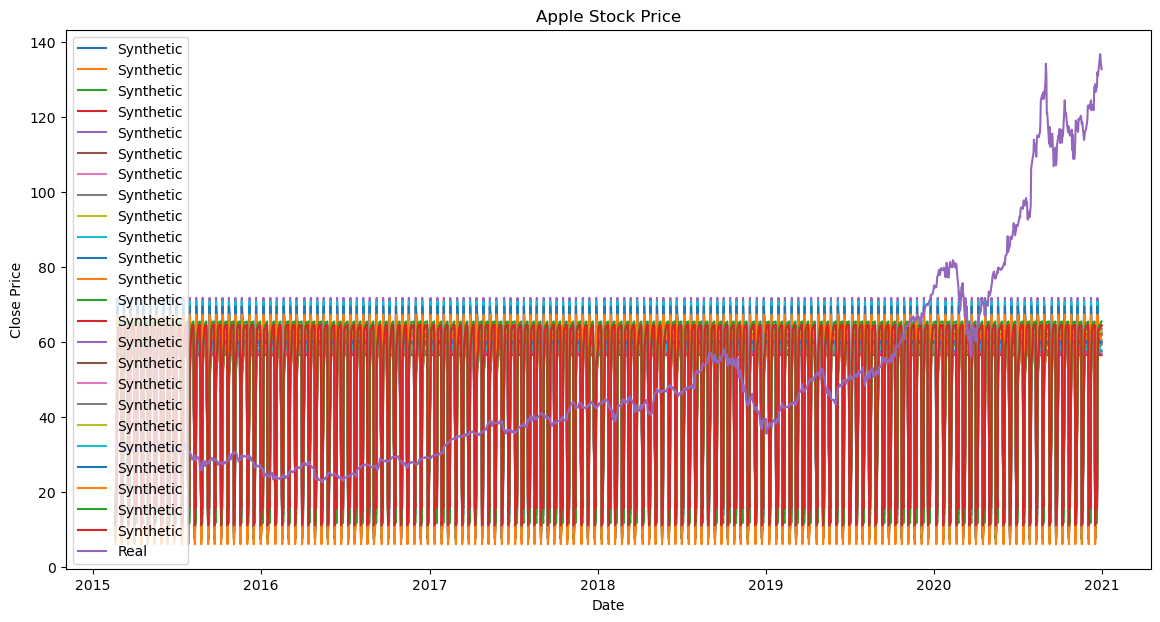

In [188]:
# Now plot the time series against each other, the Real vs the Synthetic
plt.figure(figsize=(14, 7))
plt.plot(df['Date'].values[-len(generated_data):], generated_data[:, :, 0], label='Synthetic')
plt.plot(df['Date'].values[-len(generated_data):], df['Close'].values[-len(generated_data):], label='Real')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Apple Stock Price')
plt.legend()
plt.show()  

NameError: name 'tickers' is not defined

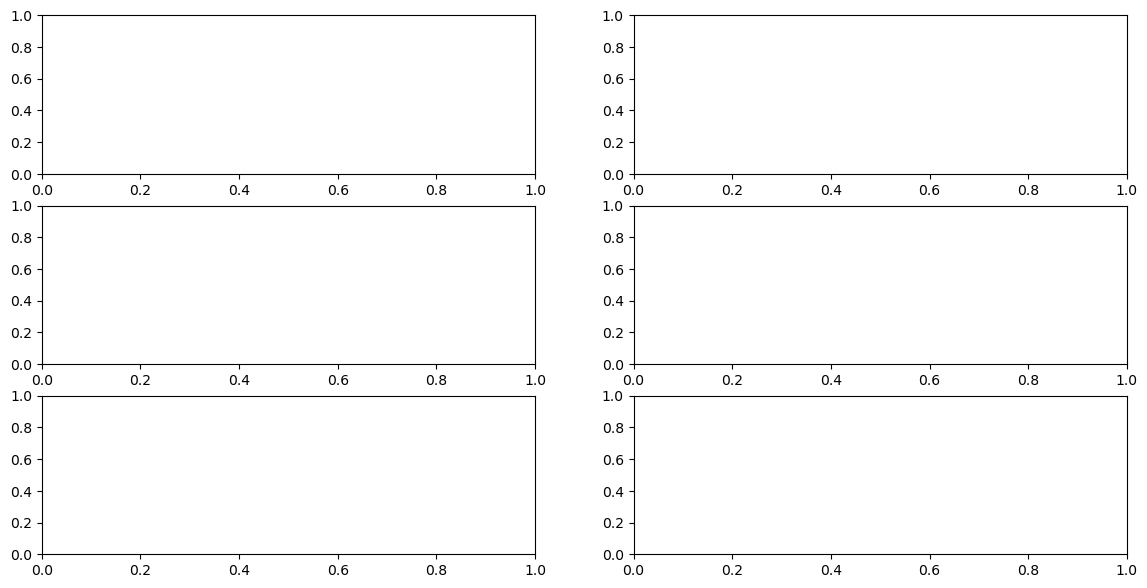

In [185]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 7))
axes = axes.flatten()

index = list(range(1, 25))N
synthetic = generated_data[np.random.randint(n_windows)]

idx = np.random.randint(len(df) - seq_len)
real = df.iloc[idx: idx + seq_len]

for j, ticker in enumerate(tickers):
    (pd.DataFrame({'Real': real.iloc[:, j].values,
                   'Synthetic': synthetic[:, j]})
     .plot(ax=axes[j],
           title=ticker,
           secondary_y='Synthetic', style=['-', '--'],
           lw=1))
sns.despine()
fig.tight_layout()